군집(clustering)은 데이터셋을 클러스터라는 그룹으로 나누는 작업이다. 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표이다. 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측)한다.

# 3.5.1 k-평균 군집

k-means 군집은 가장 간단하고 또 널리 사용하는 군집 알고리즘이다. 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾는다. 알고리즘은 두 단계를 반복한다. 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정한다. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료된다. 다음은 예시용 데이터셋에 k-menas 군집을 적용한 예이다.

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.model_selection import train_test_split as tts

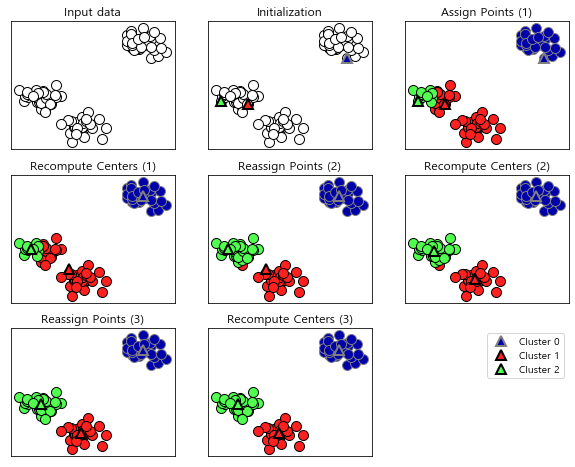

In [3]:
mglearn.plots.plot_kmeans_algorithm()

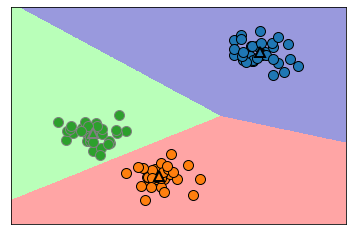

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성한다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만든다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


세 개의 클러스터를 지정했으므로 각 클러스터는 0에서 2까지의 번호가 붙는다.

또 predict 메서드를 사용해 새로운 데이터의 클러스터 레이블을 예측할 수 있다. 예측은 각 포인트에 가장 가까운 클러스터 중심을 할당하는 것이며 기존 모델을 변경하지 않는다. 훈련 세트에 대해 predict 메서드를 실행하면 labels_와 같은 결과를 얻게 된다.

In [7]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


군집은 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 조금 비슷해 보인다. 그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않다. 앞서 이야기한 얼굴 이미지를 군집시키는 예를 생각해보면, 알고리즘이 찾은 클러스터 3에는 한 친구의 얼굴만 담겨 있을 수 있다. 하지만 이는 사진들을 직접 봐야 알 수 있으며 숫자 3은 아무런 의미가 없다. 알고리즘이 우리에게 주는 정보는 3이라고 레이블된 얼굴들은 모두 서로 비슷하다는 것이다.

2차원 예제 데이터에서 군집 알고리즘을 적용할 때 한 그룹의 레이블은 0으로, 다른 그룹은 1로 지정되는 것은 중요하지않다. 초기화를 무작위로 하기 때문에 알고리즘을 다시 실행하면 클러스터의 번호가 다르게 부여될 수 있다.

이 데이터의 그래프를 다시그려보자. cluster_centers_ 속성에 저장된 클러스터 중심을 삼각형으로 표시했다.

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


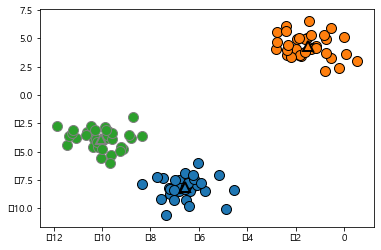

In [8]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)

이번에는 클러스터 수를 늘리거나 줄여보자.

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


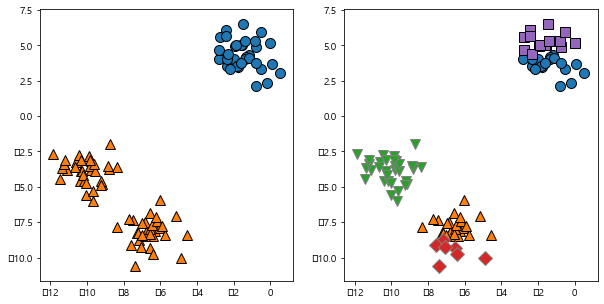

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

# 두 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])


**k-means 알고리즘이 실패하는 경우**

데이터셋의 클러스터 개수를 정확하게 알고 있더라도 k-means 알고리즘이 항상 이를 구분해낼 수 있는 것은 아니다. 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타난다. 이런 이유로 k-means 알고리즘은 비교적 간단한 형태를 구분할 수 있다. 또한 k-means는 모든 클러스터의 반경이 똑같다고 가정한다. 그래서 클러스터 중심 사이의 정확히 중간에 경계를 그린다. 이는 가끔 예상치 않은 결과를 만든다.

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


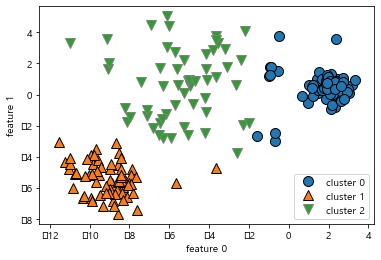

In [10]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std = [1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc = 'best')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

클러스터 0과 2는 클러스터 중심에서 멀리 떨어진 포인트들도 포함하고있다.

k-means는 또 클러스터에서 모든 방향이 똑같이 중요하다고 가정한다. k-means는 가장 가까운 클러스터 중심까지의 거리만 고려하기 때문에 대각선으로 늘어서 있는 이런 데이터를 잘 처리하지 못한다.

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


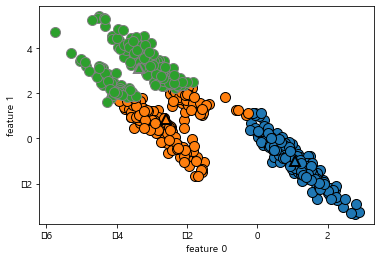

In [11]:
# 무작위로 클러스터 데이터를 생성.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


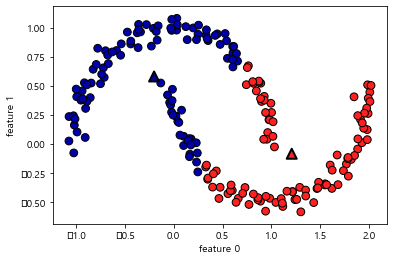

In [12]:
# two_moons 데이터를 생성.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시한다.
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
           edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

군집 알고리즘이 두 개의 반달 모양을 구분하면 좋겠지만 k-means 알고리즘을 사용해서는 어렵다.

**벡터 양자화 또는 분해 메서드로서의 k-emans**

k-means는 군집 알고리즘이지만, k-means와 PCA나 NMF 같은 분해 알고이즘 사이에는 유사점이 있다. PCA는 데이터에서 분산이 가장 큰 방향을 찾으려 하고, NMF는 데이터의 극단 또는 일부분에 상응되는 중첩할 수 있는 성분을 찾는다. 두 방법 모두 데이터 포인트를 어떤 성분의 합으로 표현한다. 반면에 k-means는 클러스터 중심으로 각 데이터를 표현한다. 이를 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있다. k-means를 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 ***벡터 양자화*** 라고 한다.

PCA, NMF, k-means에서 추출한 성분과 100개의 성분으로 테스트 세트의 얼굴을 재구성 한 것을 나란히 비교해보자. k-means의 경우 재구성은 훈련 세트에서 찾은 가장 가까운 클러스터의 중심이다.

In [41]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
image_shape = people.images[0].shape

In [42]:
X_train, X_test, y_train, y_test = tts(X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

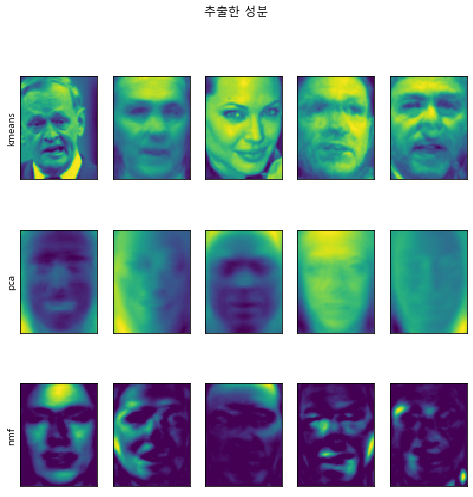

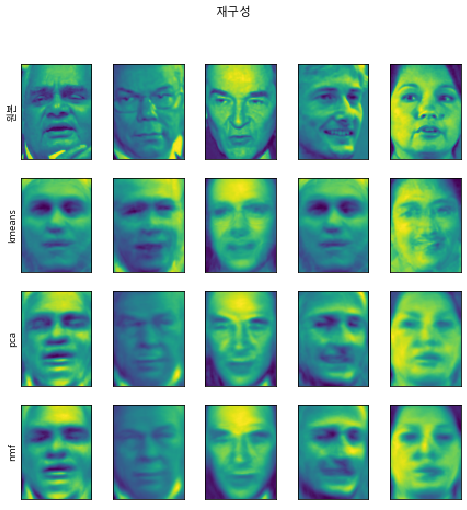

In [43]:

fig, axes = plt.subplots(3,5,figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")
fig, axes = plt.subplots(4,5, subplot_kw={'xticks':(), 'yticks':()},
                        figsize=(8,8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("원본")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

k-means를 사용한 벡터 양자화의 장점은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다는 점이다. two_moons 데이터를 다시 사용해보자. 이 데이터가 2차원이므로 PCA나 NMF로는 할 수 있는 것이 많지 않다. PCA나 NMF를 사용해 1차우너으로 축소하면 이 데이터 구조가 완전히 파괴되기 때문이다. 하지만 많은 클러스터 중심을 사용한 k-means는 데이터를 더 잘 표현할 수 있다.

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


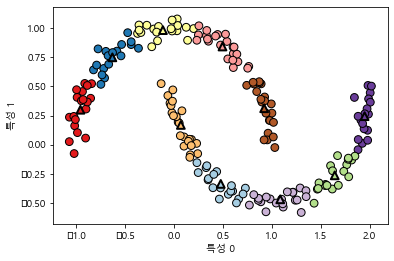

In [44]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60,
           marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

10개의 클러스터를 사용했기 때문에 각 데이터 포인트는 0에서 9 사이의 숫자가 할당되어 있다. 이는 데이터를 10개의 성분(즉 10개의 특성)으로 표현한 것으로 볼 수 있으며, 포인트가 속한 클러스터에 해당하는 특성을 제외한 다른 특성은 모두 0이라고 생각 할 수 있다.

원래 특성 2개만으로는 불가능했지만, 이 10차원 형태를 이용하면 선형 모델을 사용해 두 개의 반달 모양을 구분할 수 있을 것 같다. 또한 클러스터 중심까지의 거리를 특성으로 사용하면 데이터를 더욱 잘 나타낼 수 있다. 이 데이터는 kmeans 모델의 transform 메서드를 사용하여 구할 수있다.

In [45]:
distance_features = kmeans.transform(X)
print("클러스터 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k-means는 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기 있는 군집 알고리즘이다. k-means는 대용량 데이터셋에도 잘 작동하지만 scikit-learn은 아주 큰 대규모 데이터셋을 처리할 수 있는 MiniBatchKMeans도 제공한다.

k-means의 단점 하나는 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라진다는 점이다. 기본적으로 scikit-learn은 서로 다른 난수 초깃값으로 10번 반복하여 최선의 결과를 만든다. k-means의 더 큰 단점은 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적이며, 또 찾으려 하는 클러스터의 개수를 지정해야만 한다는 것이다. 

다음의 군집 알고리즘은 이런 단점들을 개선한 두 가지 군집 알고리즘이다.

# 3.5.2 병합군집

**병합 군집**은 다음과 같은 원리로 만들어진 군집 알고리즘의 모음을 말한다. 병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다. scikit-learn에서 사용하는 종료 조건은 클러스터 개수로, 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합친다. linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다. 이 측정은 항상 두 클러스터 사이에서 이뤄진다.

다음은 scikit-learn 에 구현된 옵션이다.
**ward** : 기본값인 ward 연결은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비교적 비슷한 클러스터가 만들어진다.

**average** : average 연결은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.

**complete** : complete 연결은 클러스터 포인트 사이의 최대거리가 가장 짧은 두 클러스터를 합친다.

ward가 대부분의 데이터셋에 알맞기 때문에 예제에서 이 옵션을 사용한다. 클러스터에 속한 포인트 수가 많이 다를 땐(예를 들면 한 클러스터가 다른 것보다 매우 클 때) average나 complete가 더 나을 수 있다.

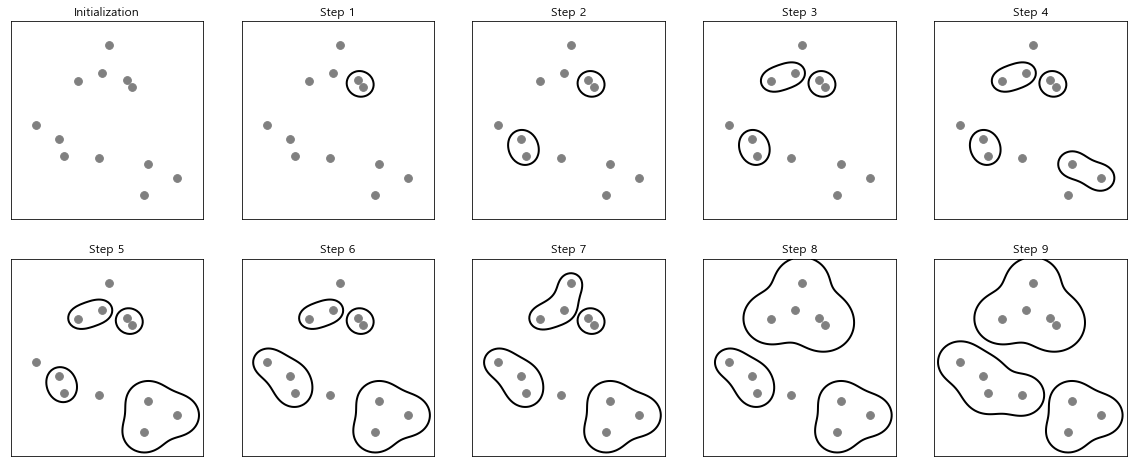

In [46]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


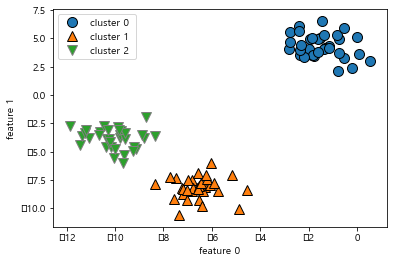

In [47]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(["cluster 0 ", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

**계층적 군집과 덴드로그램**

병합 군집은 계층적 군집을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 각 중간 단계는 데이터에 대한 클러스터를 생성한다. 이는 가능한 모든 클러스터를 연결해보는 데 도움이 된다. 

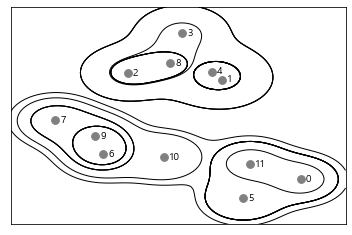

In [48]:
mglearn.plots.plot_agglomerative()

이 그래프는 계층 군집의 모습을 자세히 나타내지만, 2차원 데이터일 때뿐이며 특성이 셋 이상인 데이터셋에는 사용할 수 없다. 하지만 계층 군집을 시각화하는 또 다른 도구인 덴드로그램은 다차원 데이터셋을 처리할 수 있다.

Text(0, 0.5, '클러스터 거리')

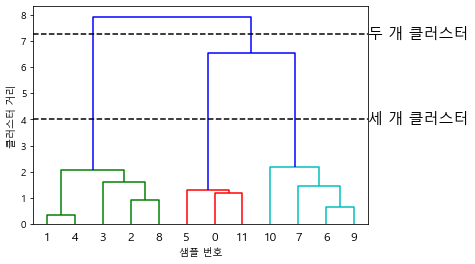

In [49]:
# SciPy 에서 ward 군집 함스와 덴드로그램 함수를 임포트한다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용한다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 반환한다.
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담신 linkage_array를 사용해 덴드로그램을 그린다.
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

# 3.5.3 DBSCAN

**DBSCAN**(density-based spatial clustering of applications with noise)은 아주 유용한 군집 알고리즘이다. DBSCAN의 주요 장점은 클러스터의 개수를 미리 지정할 필요가 없다는 점이다. 이 알고리즘은 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 구분 할 수 있다. DBSCAN은 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾는다. 이런 지역을 특성 공간의 밀집 지역 이라 한다. DBSCAN의 아이디어는 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것이다.

밀집 지역에 있는 포인트를 **핵심 샘플**(또는 핵심 포인트)라고 하며 다음과 같이 정의한다. DBSCAN에는 두개의 매개변수 min_samples와 eps가 있다. 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류한다. eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐진다.

이 알고리즘은 시작할 때 무작위로 포인트를 선택한다. 그런 다음 그 포인트에서 eps 거리안의 모든 포인트를 찾는다. 만약 eps 거리 안에 있는 포인트 수가 min_smaples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블한다. eps 거리 안에 min_samples보다 많은 포인트가 있다면 그 포인트는 핵심 샘플로 레이블하고 새로운 클러스터 레이블을 할당한다. 그런 다음 그 포인트의 (eps 거리 안의) 모든 이웃을 살핀다. 만약 어떤 클러스터에도 아직 할당되지 않았다면 바로 전에 만든 클러스터 레이블을 할당한다. 만약 핵심 샘플이면 그 포인트의 이웃을 차례로 방문한다. 이런 식으로 계속 진행하여 클러스터는 eps 거리 안에 더 이상 핵심 샘플이 없을 때까지 자라난다. 그런 다음 아직 방문하지 못한 포인트를 선택하여 같은 과정을 반복한다.

결국 포인트의 종류는 세 가지이다. 핵심 포인트, 경계 포인트(핵심 포인트에서 eps 거리 안에 있는 포인트), 그리고 잡음 포인트이다. DBSCAN을 한 데이터셋에 여러 번 실행하면 핵심 포인트의 군집은 항상 같고 매번 같은 포인트를 잡음으로 레이블한다. 그러나 경계 포인트는 한 개 이상의 클러스터 핵심 샘플의 이웃일 수 있다. 그렇기 때문에 경계 포인트가 어떤 클러스터에 속할지는 포인트를 방문하는 순서에 따라 달라진다. 보통 경계 포인트는 많지 않으며 포인트 순서 때문에 받는 영향도 적어 중요한 이슈는 아니다.

DBSCAN은 병합 군집과 마찬가지로 새로운 테스트 데이터에 대해 예측할 수 없으므로 fit_predict 메서드를 사용하여 군집과 클러스터 레이블을 한 번에 계산한다. 

In [50]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


여기서는 모든 포인트에 잡음 포인트를 의미하는 -1 레이블이 할당되었다. 이는 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples 기본값 때문이다. 여러 가지 eps, min_samples에 대한 클러스터 할당을 나타내보자.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


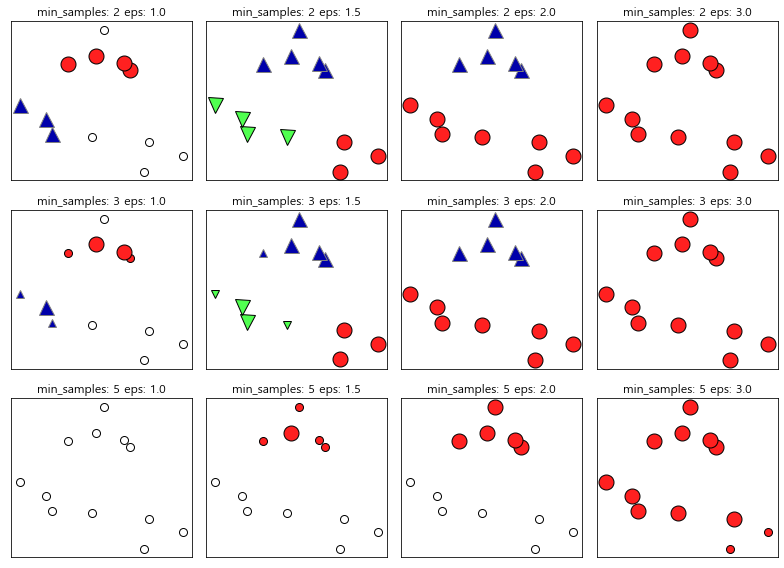

In [51]:
mglearn.plots.plot_dbscan()

이 그래프에서 클러스터에 속한 포인트는 색을 칠하고 잡음 포인트는 하얀색으로 남겨두었다. 핵심 샘플은 크게 표시하고 경계 포인트는 작게 나타냈다. eps를 증가 시키면 하나의 클러스터에 더 많은 포인트가 포함된다. 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게 만든다. min_samples를 키우면 핵심 포인트 수가 줄어 들며 잡음 포인트가 늘어난다. 

eps 매개변수는 가까운 포인트의 범위를 결정하기 때문에 더 중요하다. eps를 매우 작게 하면 어떤 포인트도 핵심 포인트가 되지 못하고, 모든 포인트가 잡음 포인트가 될 수 있다. eps를 매우 크게 하면 모든 포인트가 단 하나의 클러스터에 속하게 될 것이다.

min_samples 설정은 덜 조밀한 지역에 있는 포인트들이 잡음 포인트가 될 것인지, 아니면 하나의 클러스터가 될 것인지를 결정하는 데 중요한 역할을 한다. min_samples를 늘리면 min_samples의 수보다 작은 클러스터들은 잡음 포인트가 된다. 그러므로 min_samples는 클러스터의 최소 크기를 결정한다. 

DBSCAN은 클러스터의 개수를 지정할 필요가 없지만 eps의 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어한다. 적절한 eps 값을 쉽게 찾으려면 StandardScaler 나 MinMaxScaler로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋다.

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


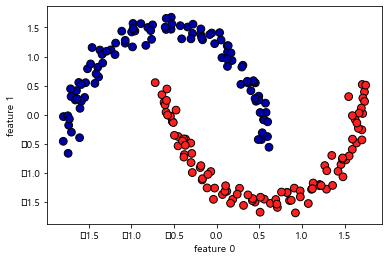

In [52]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black') 
plt.xlabel("feature 0")
plt.ylabel("feature 1")

이 알고리즘은 예상한 클러스터 개수(2개)를 만들어내므로 매개변수 설정이 잘 맞는 것 같다. eps를 (기본값인 0.5에서) 0.2로 내리면 너무 많은 8개의 클러스터를 만들어 낸다. eps를 0.7로 올리면 클러스터를 하나만 만든다.

DBSCAN을 사용할 때 클러스터 할당 값을 주의해서 다뤄야 한다. 클러스터 레이블을 다른 배열의 인덱스로 사용할 경우 잡음 포인트를 의미하는 -1 값이 예상치 못한 결과를 만들 수 있기 때문이다.

# 3.5.4 군집 알고리즘의 비교와 평가

군집 알고리즘을 적용하는 데 어려운 점 하나는 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어렵다는 것이다.

### 타깃값으로 군집 평가하기

군집 알고리즘의결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표들이 있다. 1(최적일 때)과 0(무작위로 분류될 때) 사이의 값을 제공하는 **ARI**(adjusted rand index)와 **NMI**(normalized mutual information)가 가장 널리 사용하는 지표이다(ARI는 음수가 될 수 있다).

다음에서 ARI를 사용해서 k-means, 병합 군집, DBSCAN 알고리즘을 비교해보자.

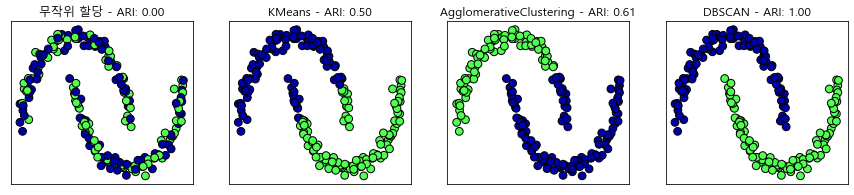

In [53]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

# 사용할 알고리즘 모델을 리스트로 만든다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 비교를 위해 무작위로 클러스터 할ㄹ당한다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

클러스터를 무작위로 할당했을 때의 ARI 점수는 0이고, DBSCAN은 완벽하게 군집을 만들어 냈으므로 점수가 1이다.

군집 모델을 평가할 때 흔히 하는 실수가 adjusted_rand_score나 normalized_mutual_info_score 같은 군집용 측정 도구를 사용하지 않고 accuracy_score를 사용하는 것이다. 정확도를 사용하면 할당된 클러스터의 레이블 이름이 실제 레이블 이름과 맞는지 확인한다. 그러나 클러스터 레이블은 그 자체로 의미가 있는 것이 아니며 포인트들이 같은 클러스터에 속해 있는가만이 중요하다.

In [54]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]
# 모든 레이블이 달라졌으므로 정확도는 0아더,
print("정확도: {:.2f}".format(accuracy_score(cluster1,cluster2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1이다.
print("ARI: {:.2f}".format(adjusted_rand_score(cluster1, cluster2)))

정확도: 0.00
ARI: 1.00


### 타깃값 없이 군집 평가하기

군집 알고리즘을 평가하는 한 방법을 설명했지만, 사실 ARI 같은 방법에는 큰 문제점이 있다. 군집 알고리즘을 적용할 때 보통 그 결과와 비교할 타깃값이 없다. 데이터가 속한 정확한 클러스터를 알고 있다면 이 정보를 이용해 분류기와 같은 지도 학습 모델을 만들 것이다. 그러므로 ARI나 NMI 같은 지표는 애플리케이션의 성능 평가가 아니라 알고리즘을 개발할 때나 도움이 된다. 

타깃값이 필요없는 군집용 지표로 **실루엣 계수**(silhouette coefficient)가 있다. 그러나 이 지표는 실제로 잘 동작하진 않는다. 실루엣 점수는 클러스터의 밀집 정도를 계산하는 것으로, 높을수록 좋으며 최대 점수는 1이다. 밀집된 클러스터가 좋긴 하지만 모양이 복잡할 때는 밀집도를 활용한 평가가 잘 들어맞지 않는다.

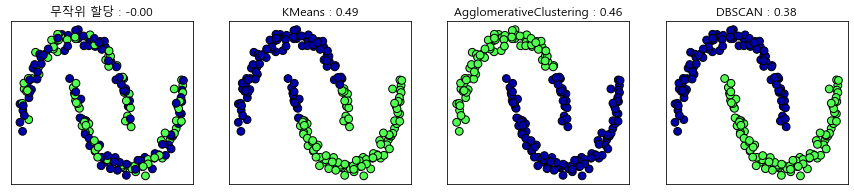

In [55]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

# 비교를 위해 무작위로 클러스터 할당한다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 : {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled, clusters)))

이 그림에서 볼 수 있듯이 DBSCAN의 결과가 더 낫지만 k-means의 실루엣 점수가 높다. 클러스터 평가에 더 적합한 전략은 견고성 기반(robustness-based)의 지표이다. 데이터에 잡음 포인트를 추가하거나 여러 가지 매개변수 설정으로 알고리즘을 실행하고 그 결과를 비교하는 것이다. 매개변수와 데이터에 변화를 주며 반복해도 결과가 일정하다면 신뢰할만 하다고 말할 수 있다. 하지만 scikit-learn에는 이 기능이 구현되어 있지 않다. 

군집 모델이 매우 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에 어떤 유의미한 것이 있는지 또는 군집이 데이터의 흥미로운 면을 반영하고 있는지는 여전히 알 수 없다. 얼굴 이미지의 예를 다시 보면, 우리는 비슷한 얼굴의 그룹을 찾고 싶다. 예를 들면 남자, 여자, 노인, 청년, 수염이 있거나 없는 사람 등이다. 만약 우리가 데이터를 두 개의 클러스터로 묶는다면 알고리즘은 어떤 포인트를 클러스터로 묶을지 계산한다. 우리는 이렇게 찾은 클러스터가 우리가 원하는 방식에 맞는 것인지 알지 못한다. 옆모습과 앞모습으로 모을 수도 있고, 밤에 찍은 사진과 낮에 찍은 사진으로 구분할 수도 있고, 아이폰으로 찍은 것과 안드로이드 폰으로 찍은 것을 묶을 수도 있다. 이 클러스터가 우리 기대에 부합하는지 알 수 있는 유일하 방법은 클러스터를 직접 확인하는 것뿐이다.

### 얼굴 데이터셋으로 군집 알고리즘 비교

LFW 데이터셋에 k-means, DBSCAN, 병합 군집 알고리즘을 적용해보고 어떤 클러스터를 찾았는지 확인해보자. PCA(whiten=True)로 생성한 100개의 주성분, 즉 고유 얼굴을 입력 데이터로 사용하자.

In [56]:
# LFW 데이터 에서 고유얼굴을 찾은 다음 데이터를 변환한다.
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [57]:
# 기본 매개변수로 DBSCAN을 적용한다.
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


레이블이 -1 뿐이므로 모든 데이터가 DBSCAN에 의해 잡음 포인트로 레이블 되었다. 바꿀수 있는 것이 eps, min_samples 두 가지가 있다. eps값을 크게 하여 각 포인트의 이웃을 늘릴 수 있고, min_samples값을 낮추어 클러스터에 모을 포인트 수를 줄일 수 있다. min_samples를 먼저 바꿔 보자.

In [58]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


클러스터의 최소 포인트를 3으로 줄여도 모두 잡음 포인트로 레이블 되었다. 그러면 eps를 키워보자.

In [59]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:",np.unique(labels))

고유한 레이블: [-1  0]


eps를 15로 크게 늘렸더니 클러스터 하나와 잡음 포인트를 얻었다. 이 결과에서 데이터의 나머지와 비교해 잡음이 어떤 것인지 확인해보자. 상황을 더 잘 이해하기 위해 잡음 포인트가 몇 개인지, 클러스터에 속한 포인트가 몇 개인지 보자.

In [60]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 센다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더한다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수이다.
print("클러스터 별 포인트 수:", np.bincount(labels+1))

클러스터 별 포인트 수: [  32 2031]


잡음 포인트는 총 32개로, 많지 않으니 모두 확인해볼 수 있다.

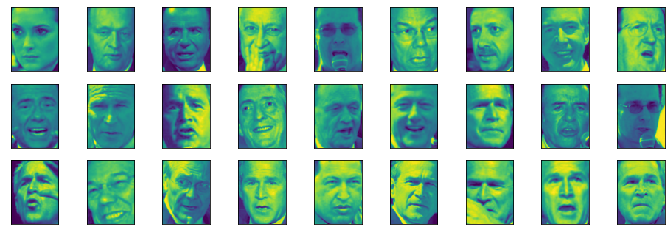

In [64]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3,9, subplot_kw={'xticks':(),'yticks':()}, figsize=(12,4))
for image, ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape))

위 사진들은 잡음으로 레이블된 사진으로 손이 얼굴 앞을 가리거나, 모자를 쓰거나, 즉 얼굴 각도가 이상하거나 얼굴을 너무 가까이서 혹은 너무 멀리서 자른 경우이다.

이렇게 특이한 것을 찾아내는 이런 종류의 분석을 **이상치 검출**(outlier detection)이라고 한다, 

큰 클러스터 하나보다 더 많은 클러스터를 찾으려면 eps를 0.5~15 사이 정도로 줄여야한다.

In [62]:
for eps in [1,3,5,7,9,11,13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수 : ", len(np.unique(labels)))
    print("클러스터 크기 : ", np.bincount(labels+1))


eps= 1
클러스터 수 :  1
클러스터 크기 :  [2063]

eps= 3
클러스터 수 :  1
클러스터 크기 :  [2063]

eps= 5
클러스터 수 :  1
클러스터 크기 :  [2063]

eps= 7
클러스터 수 :  14
클러스터 크기 :  [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
클러스터 수 :  4
클러스터 크기 :  [1307  750    3    3]

eps= 11
클러스터 수 :  2
클러스터 크기 :  [ 413 1650]

eps= 13
클러스터 수 :  2
클러스터 크기 :  [ 120 1943]


eps가 작으면 모든 포인트가 잡음으로 레이블 된다. eps=7에서 잡음 포인트가 많지만 작은 클러스터도 많이 생겼다. eps=9일 때 잡음 포인트가 여전히 많지만 큰 클러스터 하나와 작은 클러스터 여러 개를 얻었다. eps=11 부터는 큰 클러스터 하나와 잡음 포인트를 만들어 낸다.

재미있는 사실은 큰 클러스터가 하나밖에 없다는 것이다. 큰 클러스터 하나가 대부분의 포인트를 포함하고 작은 클러스터가 몇 개 있을 뿐이다. 이는 데이터에 확연히 구분되는 얼굴 이미지가 두세 개가 아니고 모든 이미지는 거의 동일하게 나머지 이미지들과 비슷하다는(또는 비슷하지 않다는) 것을 의미한다.

작은 클러스터가 많이 만들어진 eps=7 의 결를 뜯어보자.

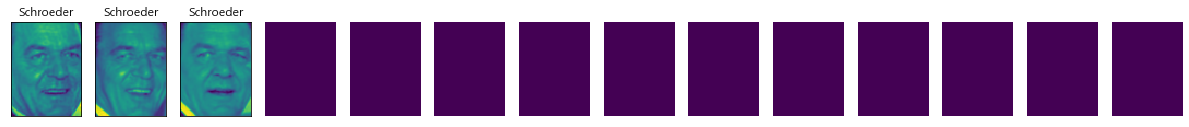

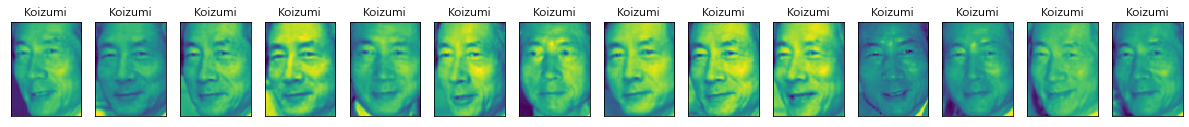

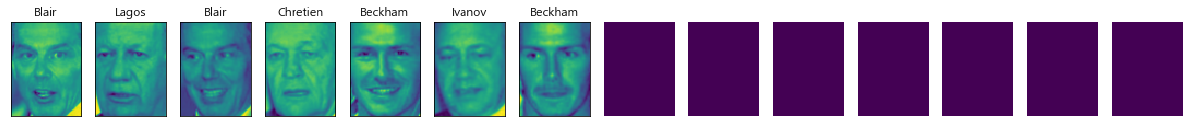

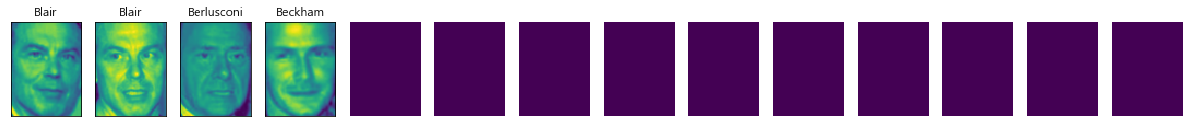

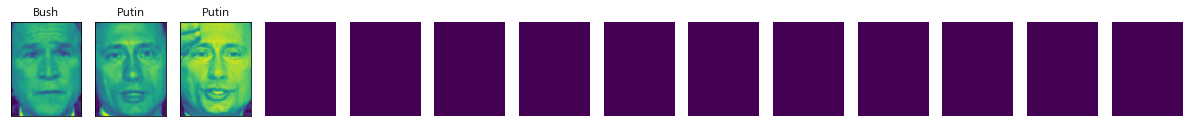

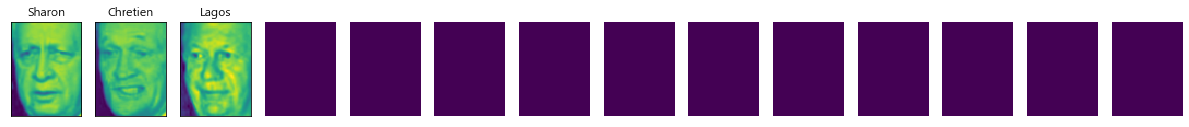

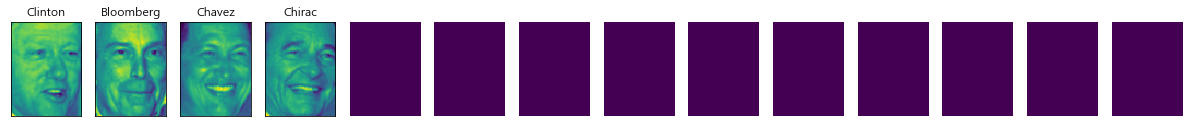

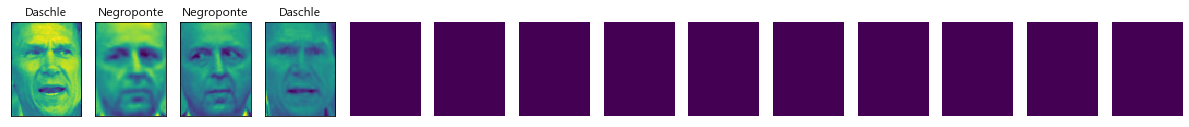

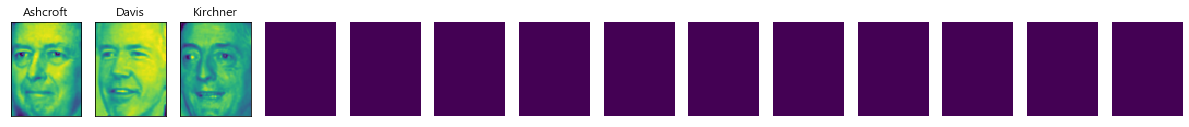

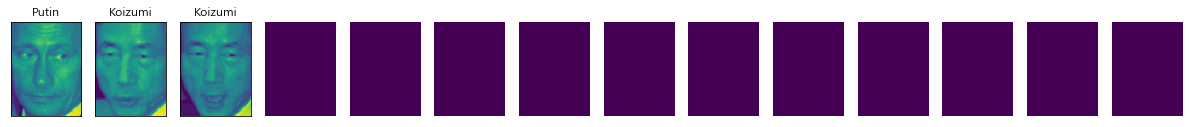

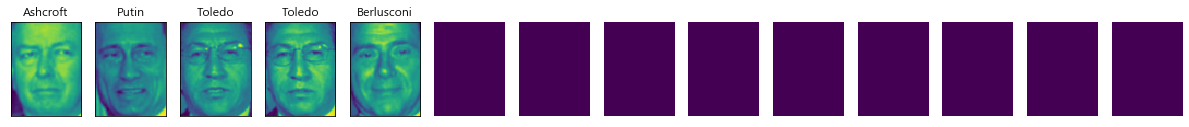

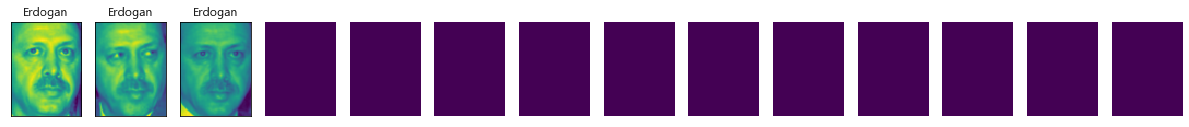

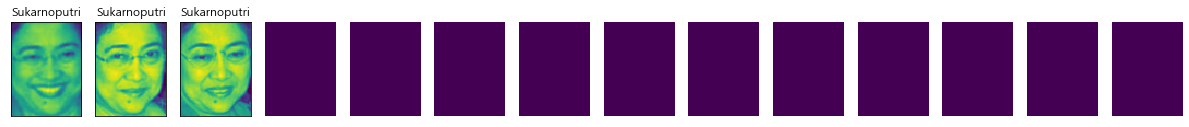

In [66]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                            subplot_kw={'xticks':(), 'yticks':()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes)-i):
        axes[j+i].imshow(np.array([[1]*65]*87))
        axes[j+i].axis('off')

몇 개 클러스터는 Schroeder나 Koizumi처럼 매우 뚜렷한 얼굴을 가진 사람들이ㅏ. 같은 클러스터의 이미지들은 얼굴 표정과 각도가 거의 동일하다. 일부 클러스터는 여러 사람의 얼굴을 포함하지만 방향과 표정이 비슷하다.

이것으로 얼굴 데이터셋이 적용한 DBSCAN 알고리즘의 분석을 마친다. 여기서 우리는 수동으로 직접 분석했으며, 이는 지도 학습에서 R^2 점수나 정확도를 기반으로 한 훨씬 자동화된 탐색 방식과는 차이가 있다.

이제 k-means와 병합 군집을 적용해보자.

###  k-means 로 얼굴 데이터셋 분석하기

DBSCAN에서는 하나의 큰 클러스터 외에는 만들 수 없다는 것을 보았다. 이에 비해 병합 군집과 k-means는 비슷한 크기의 클러스터들을 만들 수 있지만 클러스터 개수를 지정해야만 한다. 이 데이터셋에서는 실제 사람 수를 알고 있으므로 클러스터의 수를 지정할 수 있지만, 비지도 군집 알고리즘이 원래대로 복원해낼 것 같지는 않다. 그 대신 클러스터 개개를 분석 해볼 수 있도록 클러스터 개수를 10 정도로 줄여서 적용해보자.

In [68]:
# k-means로 클러스터를 추출한다.
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-means의 클러스터 크기:", np.bincount(labels_km))

k-means의 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


k-means 군집은 데이터를 비교적 비슷한 크기인 91에서 358까지의 클러스터로 나누었다. 이는 DBSCAN의 결과와는 매우 다르다.

k-means 클러스터 중심을 시각화해보면 결과를 더 자세히 분석할 수 있다. PCA 성분으로 군집 알고리즘을 적용했기 때문에 k-means의 클러스터 중심을 pca.inverse_transform을 사용해 원본 공간으로 되돌린 후 시각화해야 한다.

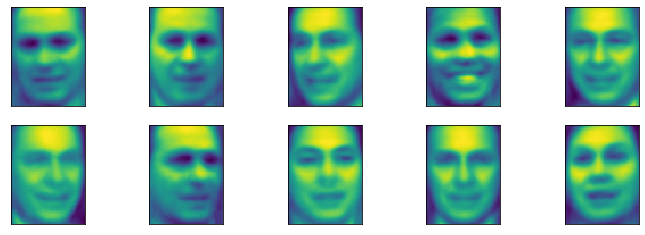

In [69]:
fig, axes = plt.subplots(2,5, subplot_kw={'xticks':(), 'yticks':()},
                        figsize=(12,4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape))

k-means가 찾은 클러스터 중심은 매우 부그러운 얼굴 이미지이다. 사실 각 중심 이미지는 91개에서 358개까지 얼굴 이미지의 평균이기 때문에 별로 놀라운 일은 아니다. 그리고 차원이 감소된 PCA 성분이 이미지를 더 부드럽게 만든다. 군집 알고리즘은 각기 다른 얼굴의 각도와 다른 표정, 셔츠 깃의 여부를 선택한 것으로 보인다.

좀 더 자세히 보기 위해 각 클러스터에서 가장 대표되는 이미지 다섯 개와 가장 동떨어진 이미지 다섯 개를 나타내보자.

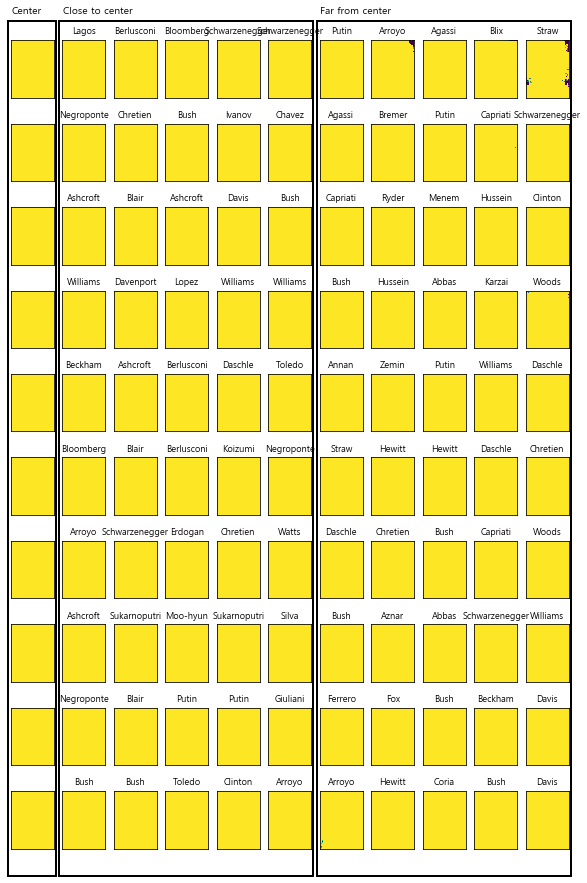

In [70]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

***사진이 안나와서 책을 보고 진행***

위 그림을 보면 세 번째 클러스터가 웃는 얼굴이고 나머지 클러스터는 얼굴 각도를 중시한다고 생각할 수 있다. 중심에서 먼 포인트들은 클러스터 중심과 많이 달라 보이고 특별한 규칙이 없는 것 같다. 이는 k-means가 DBSCAN처럼 잡음 포인트 개념이 없이 모든 포인트를 구분하기 때문이다. 클러스터 수를 늘리면 알고리즘이 미세한 차이를 더 찾을 수 있다. 그러나 클러스터를 많이 추가하면 직접 조사하는 것이 더 어려워진다.

### 병합군집으로 얼굴 데이터셋 분석하기

In [71]:
# 병합 군집으로 클러스터를 추출한다.
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


병합 군집도 비교적 비슷하 크기인 18개에서 660개 크기의 클러스터를 만든다. k-means보다는 크기가 고르지 않지만 DBSCAN보다는 훨씬 비슷한 크기이다.

ARI 점수를 이용해 병합 군집과 k-means로 만든 두 데이터가 비슷한지 측정해보자.

In [72]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


ARI 값이 0.09라는 것은 두 군집 labels_agg와 labels_km에 공통 부분이 거의 없다는 끗이다. 사실 k-means의 클러스터 중심에서 멀리 떨어진 포인트는 공통 부분이 거의 없을 것 같다.

다음엔 덴드로그램을 그려보겠다. 2063개 데이터 포인트를 모두 트리로 나타내면 너무 복잡해지므로 이 예제에서는 트리 깊이를 제한했다.

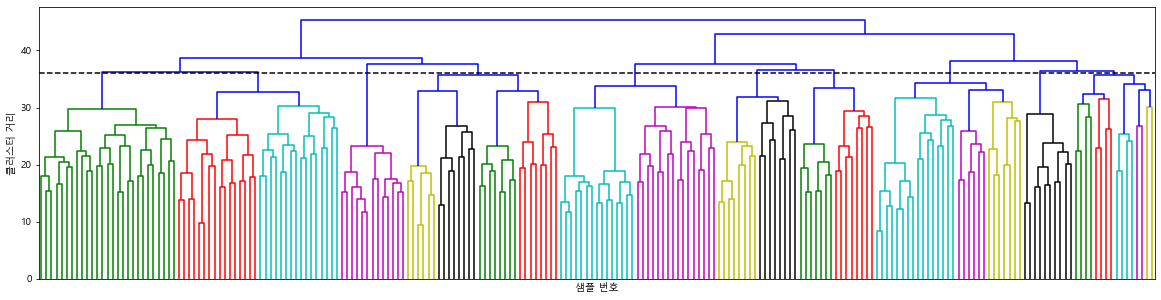

In [73]:
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨 있는 linkage_array로 덴드로그램을 그린다.
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds, [36,36], '--', c='k')

# 3.5.5 군집 알고리즘 요약

이번 절에서는 군집 알고리즘을 적용하고 평가하는 것이 매우 정성적인 분석 과정이며 탐색적 데이터 분석 단계에 크게 도움될 수 있다는 것을 보았다. 우리는 k-means, DBSCAN, 병합 군집이라는 세 가지 군집 알고리즘을 살펴보았다. 세 알고리즘 모두 군집을 세밀하게 조절할 수 있는 방법을 제공한다. k-means와 병합 군집은 우너하는 클러스터 개수를 지정할 수 있고 DBSCAN은 eps 매개변수를 사용하여 클러스터 크기를 간접적으로 조절할 수 있다. 이 세 모델은 실제 대량의 데이터셋에 사용할 수 있고 비교적 쉽게 이해할 수 있으며 여러 개의 클러스터로 군집을 만들 수 있다.

각 알고리즘은 조금씩 다른 장점을 가지고 있다. k-means는 클러스터 중심을 사용해 크러스터를 구분한다. 이 알고리즘은 각 데이터 포인트를 클러스터의 중심으로 대표할 수 있기 때문에 분해 방법으로 볼 수도 있다. DBSCAN은 클러스터에 할당되지 않는 잡음 포인트를 인식할 수 있으며 클러스터의 개수를 자동으로 결정한다. 다른 두 알고리즘과는 달리 two_moons 예에서 처럼 복잡한 클러스터의 모양을 인식할 수 있다. DBSCAN은 크기가 많이 다른 클러스터를 만들어 내곤 하는데 장점이기도 하고 단점이 될 수도 있다. 병합 군집은 전체 데이터의 분할 계층도를 만들어주며 덴드로그램을 사용해 손쉽게 확인할 수 있다.